# Model Training

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR  
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings


In [2]:
df = pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## preparing x and y values 

In [4]:
x = df.drop(columns=['math_score'],axis=1) 

In [5]:
x.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [6]:
y = df['math_score']

In [7]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [8]:
## create columns transformation with  3 types of transformations

num_features = x.select_dtypes(exclude="object").columns
cat_feature = x.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessing   = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_features),
        ("cat", categorical_transformer, cat_feature),
    ]
)

In [9]:
x = preprocessing.fit_transform(x)

In [10]:
x.shape

(1000, 19)

In [11]:
## seperate dataset into train and test

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
x_train.shape,x_test.shape

((800, 19), (200, 19))

# create an evaluate function to evaluate our model training 

In [13]:
def eval_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2 = r2_score(true,predicted)
    return mae,mse,rmse,r2

In [14]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor(),
    "SVR": SVR(),
    "CatBoostRegressor": CatBoostRegressor(verbose=False),
    "XGBRegressor": XGBRegressor()
}

In [15]:
model_list = []
r2_list = []

# Loop through dictionary items directly
for model_name, model in models.items():
    
    # Train model
    model.fit(x_train, y_train)

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Evaluate Train and Test dataset
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = eval_model(
        y_train, y_train_pred
    )
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = eval_model(
        y_test, y_test_pred
    )

    print(model_name)
    model_list.append(model_name)
    r2_list.append(model_test_r2)

    print('Model performance for training set')
    print('Root Mean Squared Error : {:.4f}'.format(model_train_rmse))
    print('Mean Absolute Error     : {:.4f}'.format(model_train_mae))
    print('Mean Squared Error      : {:.4f}'.format(model_train_mse))
    print('R2 Score                : {:.4f}'.format(model_train_r2))

    print('=' * 35)
    print()


LinearRegression
Model performance for training set
Root Mean Squared Error : 5.3231
Mean Absolute Error     : 4.2667
Mean Squared Error      : 28.3349
R2 Score                : 0.8743

Ridge
Model performance for training set
Root Mean Squared Error : 5.3233
Mean Absolute Error     : 4.2650
Mean Squared Error      : 28.3378
R2 Score                : 0.8743

Lasso
Model performance for training set
Root Mean Squared Error : 6.5938
Mean Absolute Error     : 5.2063
Mean Squared Error      : 43.4783
R2 Score                : 0.8071

KNeighborsRegressor
Model performance for training set
Root Mean Squared Error : 5.7155
Mean Absolute Error     : 4.5205
Mean Squared Error      : 32.6667
R2 Score                : 0.8551

DecisionTreeRegressor
Model performance for training set
Root Mean Squared Error : 0.2795
Mean Absolute Error     : 0.0187
Mean Squared Error      : 0.0781
R2 Score                : 0.9997

RandomForestRegressor
Model performance for training set
Root Mean Squared Error : 2.

### Result 

In [16]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
1,Ridge,0.880593
0,LinearRegression,0.880433
5,RandomForestRegressor,0.853139
8,CatBoostRegressor,0.851632
6,AdaBoostRegressor,0.846229
2,Lasso,0.825320
9,XGBRegressor,0.821221
3,KNeighborsRegressor,0.783589
4,DecisionTreeRegressor,0.744759
7,SVR,0.728600


## Linear Regression

In [18]:
lin_model = LinearRegression()
lin_model = lin_model.fit(x_train,y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test,y_pred)
print("Accuracy of the model is %2f"%score)




Accuracy of the model is 0.880433


## Pot y_pred and y_test

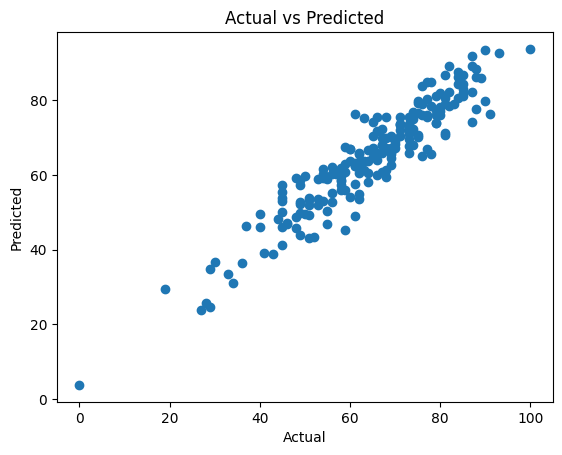

In [19]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

<Axes: xlabel='math_score'>

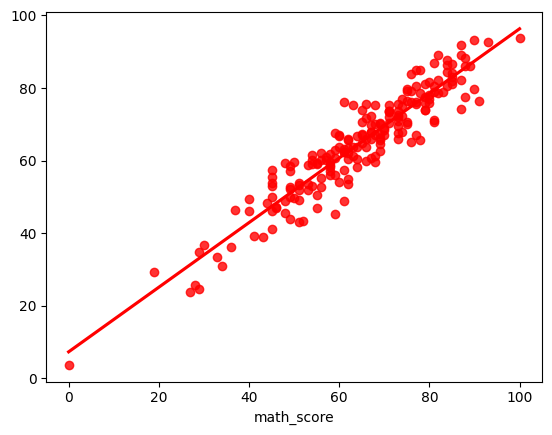

In [21]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='r')